In [180]:
import matplotlib.pyplot as plt
import numpy as np                              
from scipy.integrate import solve_ivp 
from scipy.stats import norm      
import numpy as numpy

In [181]:
def sir_odes(t, x, b, g, N):
    "SIR Model"
    

    S = x[0]
    I = x[1]
    R = x[2]


    dSdt = -(b/N)*S*I
    dIdt = (b/N)*S*I - g*I
    dRdt = g*I

    
    return dSdt, dIdt, dRdt

In [182]:
def sir_odes_dat(t, x, b, g, N):
    "SIR Model"
    

    S = x[0]
    I = x[1]
    R = x[2]
    
    b = np.random.normal(b,0.1*b)
    g = np.random.normal(g,0.1*g)
    dSdt = -(b/N)*S*I
    dIdt = (b/N)*S*I - g*I
    dRdt = g*I
    
    
    
    return dSdt, dIdt, dRdt

In [183]:
def data_generator(t_span, x_0,args,t):

    sol = solve_ivp(sir_odes_dat, t_span, x_0, args=(args), t_eval=t)
    S = sol.y[0]
    I = sol.y[1]
    R = sol.y[2]
    
    S_data = np.random.normal(S,0.1*S)
    I_data = np.random.normal(I, 0.1 * I)
    R_data = np.random.normal(R, 0.1 * R)

    
    return I_data

In [184]:
I_data = data_generator(t_span, x_0,args,t)

In [185]:
"Set up of Model parameters"
t_span = np.array([0, 25])  # Time limits
t = np.linspace(t_span[0], t_span[1], t_span[1] * 10 )  # Time series
x_0 = np.array([998, 2, 0])  # Initial conditions for model variables: S, I, R respectively
N = np.sum(x_0)
args = (1.4, 0.3, N)  # Arguments for our model parameters: \beta, \gamma, N

In [186]:
sol = solve_ivp(sir_odes, t_span, x_0, args=(args), t_eval=t)

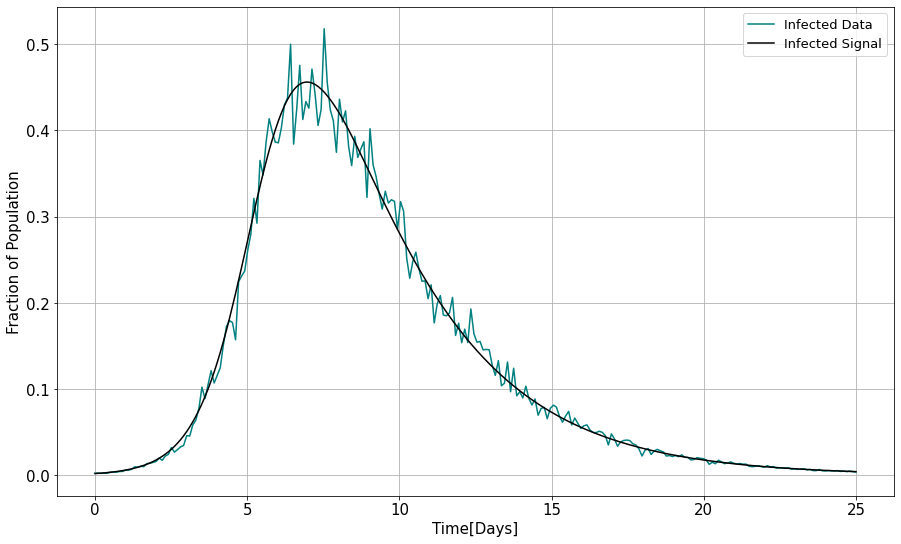

In [187]:
I = sol.y[1]
plt.figure(figsize=(15,9))
plt.plot(t,I_data/N,label = 'Infected Data',color='teal')
plt.plot(t,I/N,label = r'Infected Signal',color='black')
plt.xlabel("Time[Days]", fontsize = 15)
plt.ylabel("Fraction of Population", fontsize = 15)
plt.legend(fontsize=13)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.savefig('SIR_Data')
plt.show()


In [188]:
def chain_markov(data,t_span, x_0,t,gen, N):
    "markov process for SIR model only for now"

    b_store = []
    g_store = []
    all_chi_vals = []
    p = 0.8
    for j in range(1):
        print("Chain: ", 1)

        args = np.random.uniform(0,10,2)
        args = np.append(args, N)
        b_store.append(args[0]) # creating our lsit
        g_store.append(args[1])

        sol = solve_ivp(sir_odes, t_span, x_0, args=args, t_eval=t)

        I = sol.y[1]
        I_store = np.array(I)

        chi_value = np.sum(np.square((data - I)))
        chi_store = chi_value
        all_chi_vals.append(chi_store)

        arg_store = np.array(args)

        args[0] = np.random.normal(args[0], 0.1, 1)
        args[1] = np.random.normal(args[1], 0.1, 1)



        for i in range(gen):


            sol = solve_ivp(sir_odes, t_span, x_0, args= args, t_eval=t)

            I = sol.y[1]

            chi_value = np.sum(np.square((data - I)))
            if chi_value < chi_store:
                chi_store = chi_value
                arg_store = np.array(args)


                args[0] = np.random.normal(args[0], 0.01, 1)
                args[1] = np.random.normal(args[1], 0.01, 1)

                b_store.append(arg_store[0])  # creating our lsit
                g_store.append(arg_store[1])
                all_chi_vals.append(chi_store)

                I_store = I

            else:

                bolt = np.random.uniform(0,1)
                if bolt > p :
                    chi_store = chi_value
                    arg_store = np.array(args)


                    args[0] = np.random.normal(args[0], 0.01, 1)
                    args[1] = np.random.normal(args[1], 0.01, 1)

                    b_store.append(arg_store[0])  # creating our lsit
                    g_store.append(arg_store[1])
                    all_chi_vals.append(chi_store)
                    I_store = I
                else:
                    args[0] = np.random.normal(arg_store[0], 0.01, 1)
                    args[1] = np.random.normal(arg_store[1], 0.01, 1)



        print(arg_store)
        print((chi_store))

        plt.plot(t, I_store, label="minim chi sqaured"+ str(j))


    plt.plot(t, data, label="Data" + str(j))
    plt.legend()
    plt.show()

    return b_store, g_store , all_chi_vals, I_store

Chain:  1
[1.39615747e+00 2.97365852e-01 1.00000000e+03]
55382.10136871845


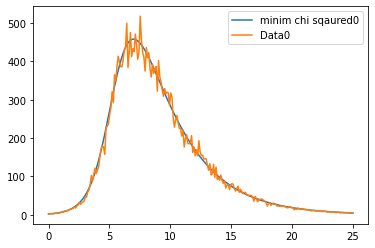

In [189]:
gen = 16000
data = I_data
b,g,chi, I_min = chain_markov(data, t_span, x_0,t,gen, N)
# b,g = chain_markov(data, t_span, x_0,t,gen, N)

data = np.column_stack([chi, b , g])
datafile_path = "chain"
np.savetxt(datafile_path , data, fmt=['%f','%f', '%f'])

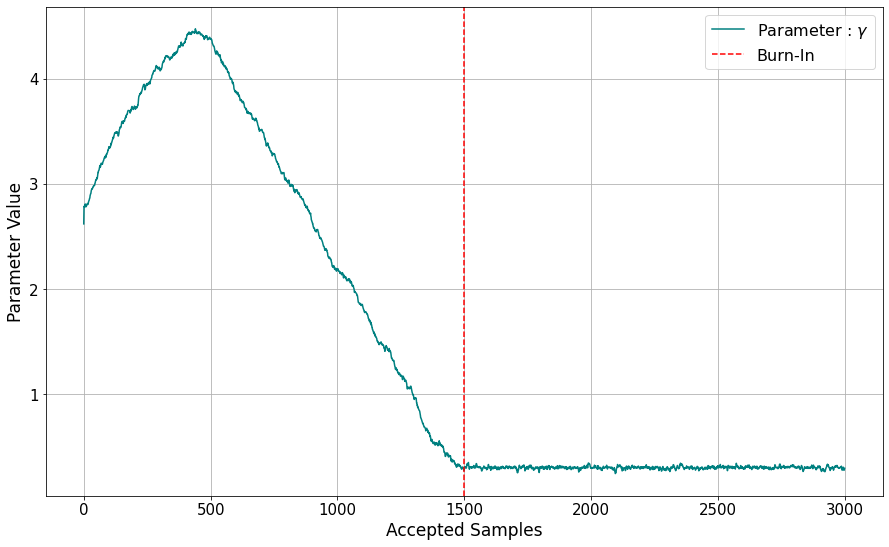

In [193]:
plt.figure(figsize=(15,9))        
plt.plot(g[:3000], label = r'Parameter : $\gamma$ ', color = 'teal')

plt.xlabel("Accepted Samples", fontsize = 17)
plt.ylabel("Parameter Value", fontsize = 17)

plt.axvline(1500, color = 'r', ls = '--', label = 'Burn-In')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=16, loc = 1)
plt.grid()
plt.savefig('gam param find')
plt.show()

In [194]:
"Set up of Model parameters"
t_span = np.array([0, 25])  # Time limits
t = np.linspace(t_span[0], t_span[1], t_span[1] * 10 )  # Time series
x_0 = np.array([998, 2, 0])  # Initial conditions for model variables: S, I, R respectively
N = np.sum(x_0)
args = (1.388, 0.299, N)  # Arguments for our model parameters: \beta, \gamma, N
sol = solve_ivp(sir_odes, t_span, x_0, args=(args), t_eval=t)
S_min = sol.y[0]
I_min = sol.y[1]
R_min = sol.y[2]

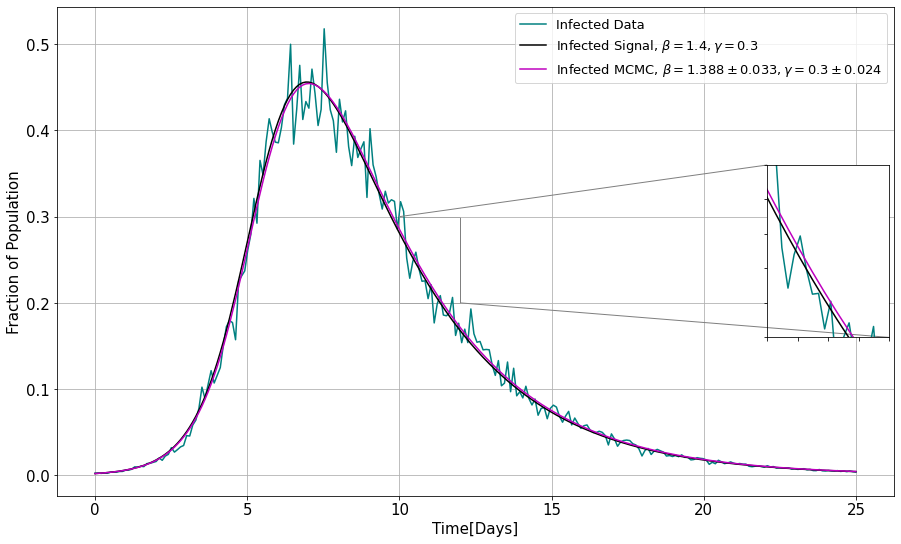

In [195]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

plt.figure(figsize=(15,9))
ax = plt.axes()
ax.plot(t,I_data/N,label = 'Infected Data',color='teal')
ax.plot(t,I/N,label = r'Infected Signal, $\beta = 1.4, \gamma = 0.3 $',color='black')
ax.plot(t,I_min/N,label = r'Infected MCMC, $\beta = 1.388 \pm 0.033, \gamma = 0.3 \pm 0.024   $', color = 'm')
plt.xlabel("Time[Days]", fontsize = 15)
plt.ylabel("Fraction of Population", fontsize = 15)
plt.legend(fontsize=13)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

# by trial and error. How can I pass more elegantly the dates as something like
x1 = 10
x2 = 12

# select y-range for zoomed region
y1 = 0.2
y2 = 0.3

# Make the zoom-in plot:
axins = zoomed_inset_axes(ax, 2, loc=5) # zoom = 2
axins.plot(t,I_data/N,label = 'Infected Data',color='teal')
axins.plot(t,I/N,label = r'Infected Signal, $\beta = 1.4, \gamma = 0.3 $',color='black')
axins.plot(t,I_min/N,label = r'Infected MCMC, $\beta = 1.42 \pm 0.04, \gamma = 0.3 \pm 0.026  $', color = 'm')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.draw()

plt.savefig('MCMC infected')
plt.show()

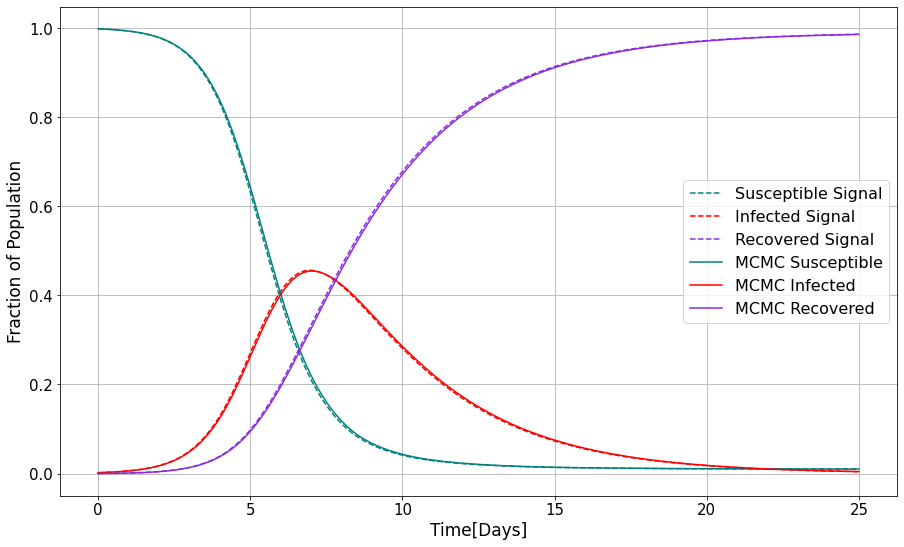

In [196]:
plt.figure(figsize=(15,9))
plt.plot(t,S/N,label = 'Susceptible Signal',color='teal', ls = '--')
plt.plot(t,I/N,label = 'Infected Signal',color='red',ls = '--')
plt.plot(t,R/N,label = 'Recovered Signal',color='blueviolet',ls = '--')
plt.plot(t,S_min/N,label = 'MCMC Susceptible',color='teal')
plt.plot(t,I_min/N,label = 'MCMC Infected', color='red')
plt.plot(t,R_min/N,label = 'MCMC Recovered', color='blueviolet')
# plt.plot(t,S/N + I/N + R/N, label = "Total Population", color = 'black', ls = '--' )
plt.xlabel("Time[Days]", fontsize = 17)
plt.ylabel("Fraction of Population", fontsize = 17)
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('SIR MCMC')
plt.show()